### Importa√ß√£o dos dados



In [66]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


In [67]:
# Faturamento de cada loja

faturamento_total_loja1 = loja['Pre√ßo'].sum()
print(f'Faturamento Total da Loja 1: {faturamento_total_loja1}')

faturamento_total_loja2 = loja2['Pre√ßo'].sum()
print(f'Faturamento Total da Loja 2: {faturamento_total_loja2}')

faturamento_total_loja3 = loja3['Pre√ßo'].sum()
print(f'Faturamento Total da Loja 3: {faturamento_total_loja3}')

faturamento_total_loja4 = loja4['Pre√ßo'].sum()
print(f'Faturamento Total da Loja 4: {faturamento_total_loja4}')

print(f'Faturamento Total: {faturamento_total_loja1 + faturamento_total_loja2 + faturamento_total_loja3 + faturamento_total_loja4}')

Faturamento Total da Loja 1: 1534509.12
Faturamento Total da Loja 2: 1488459.06
Faturamento Total da Loja 3: 1464025.03
Faturamento Total da Loja 4: 1384497.58
Faturamento Total: 5871490.79


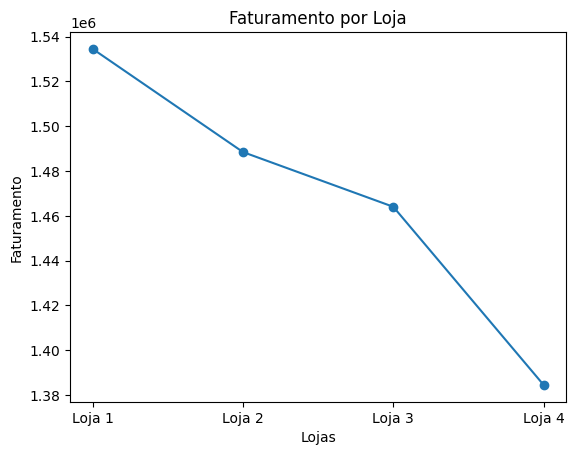

In [68]:
# Dados de faturamento (substitua pelos seus valores reais)
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_total_loja1, faturamento_total_loja2, faturamento_total_loja3, faturamento_total_loja4]

# Criar o gr√°fico de linhas
plt.plot(lojas, faturamentos, marker='o')

# Adicionar r√≥tulos e t√≠tulo
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.title('Faturamento por Loja')

# Exibir o gr√°fico
plt.show()


# 2. Vendas por Categoria


In [69]:
import pandas as pd

# Agrupando os dados por categoria e contando as vendas em cada loja
vendas_por_categoria_loja1 = loja.groupby('Categoria do Produto')['Pre√ßo'].count().sort_values(ascending=False)
vendas_por_categoria_loja2 = loja2.groupby('Categoria do Produto')['Pre√ßo'].count().sort_values(ascending=False)
vendas_por_categoria_loja3 = loja3.groupby('Categoria do Produto')['Pre√ßo'].count().sort_values(ascending=False)
vendas_por_categoria_loja4 = loja4.groupby('Categoria do Produto')['Pre√ßo'].count().sort_values(ascending=False)

# Criando um DataFrame para armazenar as vendas por categoria de cada loja
vendas_categorias = pd.DataFrame({
    'Loja 1': vendas_por_categoria_loja1,
    'Loja 2': vendas_por_categoria_loja2,
    'Loja 3': vendas_por_categoria_loja3,
    'Loja 4': vendas_por_categoria_loja4
})

# Calculando o total de vendas por categoria em todas as lojas
vendas_categorias['Total'] = vendas_categorias.sum(axis=1)

# Imprimindo o DataFrame com as vendas por categoria e o total
vendas_categorias


Loja 1  Loja 2  Loja 3  Loja 4  Total
Categoria do Produto                                        
brinquedos                324     313     315     338   1290
eletrodomesticos          312     305     278     254   1149
eletronicos               448     422     451     451   1772
esporte e lazer           284     275     277     277   1113
instrumentos musicais     182     224     177     170    753
livros                    173     197     185     187    742
moveis                    465     442     499     480   1886
utilidades domesticas     171     181     177     201    730

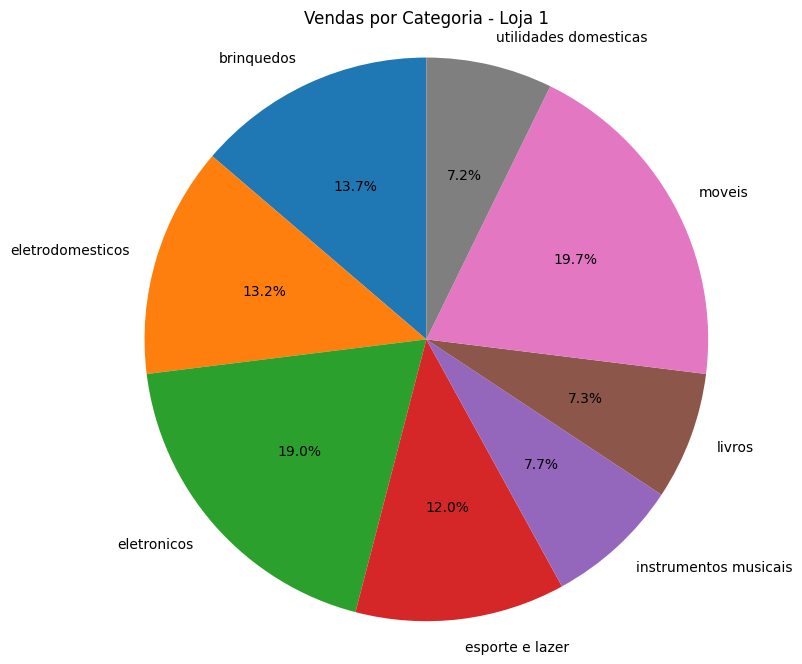

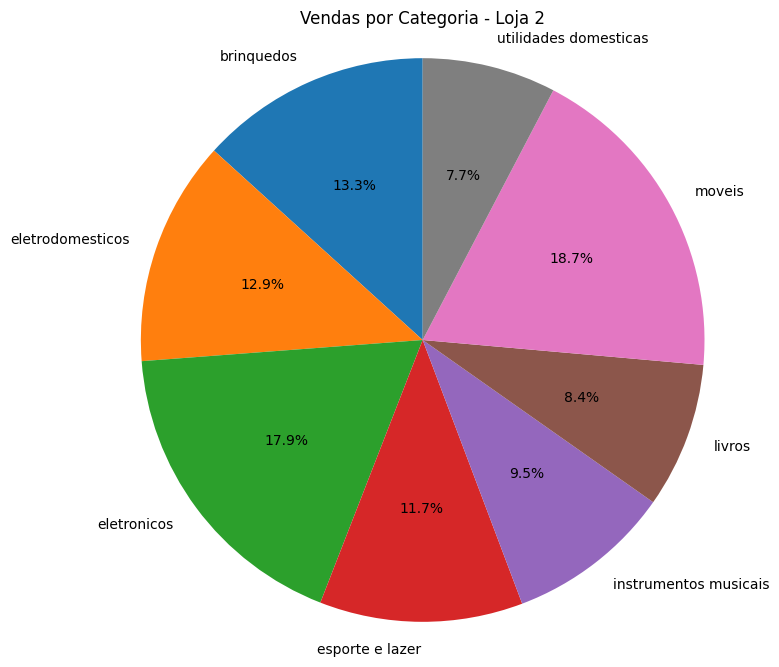

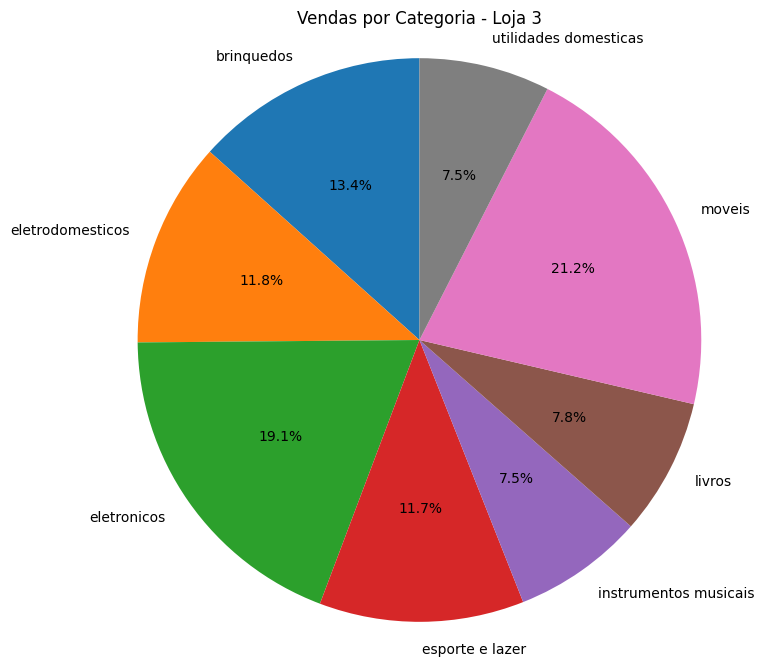

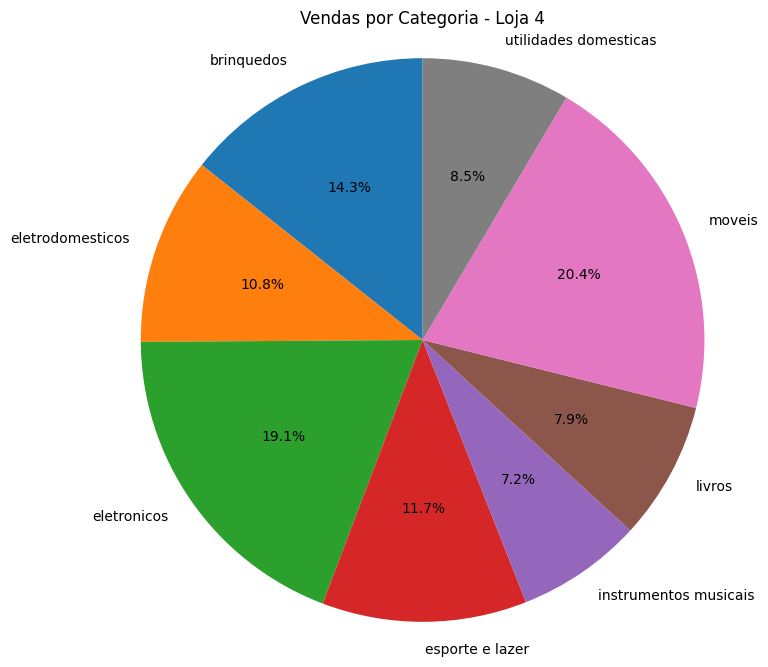

In [70]:
for loja in vendas_categorias.columns[:-1]:
    plt.figure(figsize=(8, 8))
    plt.pie(vendas_categorias[loja], labels=vendas_categorias.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Vendas por Categoria - {loja}')
    plt.axis('equal')
    plt.show()


# 3. M√©dia de Avalia√ß√£o das Lojas

In [79]:
# Calculando a m√©dia das avalia√ß√µes para cada loja
loja = pd.read_csv(url)
media_avaliacoes_loja1 = loja['Avalia√ß√£o da compra'].mean()
print(f'M√©dia de avalia√ß√µes da Loja 1: {media_avaliacoes_loja1}')

media_avaliacoes_loja2 = loja2['Avalia√ß√£o da compra'].mean()
print(f'M√©dia de avalia√ß√µes da Loja 2: {media_avaliacoes_loja2}')

media_avaliacoes_loja3 = loja3['Avalia√ß√£o da compra'].mean()
print(f'M√©dia de avalia√ß√µes da Loja 3: {media_avaliacoes_loja3}')

media_avaliacoes_loja4 = loja4['Avalia√ß√£o da compra'].mean()
print(f'M√©dia de avalia√ß√µes da Loja 4: {media_avaliacoes_loja4}')


M√©dia de avalia√ß√µes da Loja 1: 3.976685036032217
M√©dia de avalia√ß√µes da Loja 2: 4.037303942348453
M√©dia de avalia√ß√µes da Loja 3: 4.048325561678677
M√©dia de avalia√ß√µes da Loja 4: 3.9957591178965224


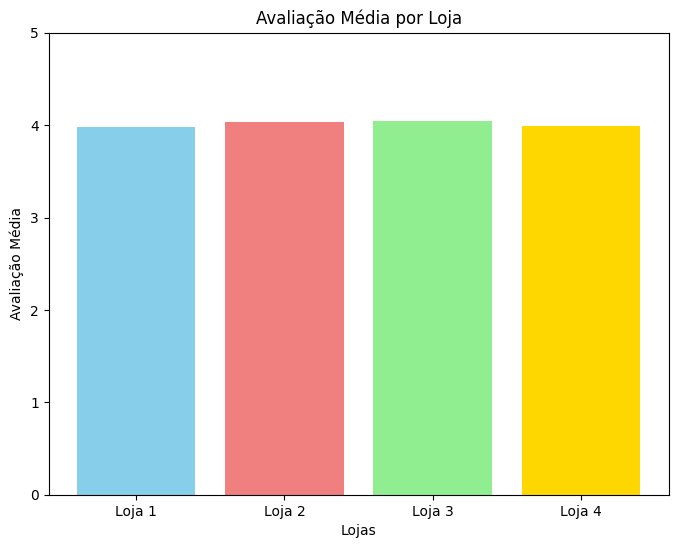

In [78]:

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
avaliacoes = [media_avaliacoes_loja1, media_avaliacoes_loja2, media_avaliacoes_loja3, media_avaliacoes_loja4]

plt.figure(figsize=(8, 6))
plt.bar(lojas, avaliacoes, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Avalia√ß√£o M√©dia por Loja')
plt.xlabel('Lojas')
plt.ylabel('Avalia√ß√£o M√©dia')
plt.ylim(0, 5)  # Define o limite do eixo y de 0 a 5 para melhor visualiza√ß√£o
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [80]:
def produtos_mais_menos_vendidos(df, loja_num):
    vendas_produto = df.groupby('Produto')['Pre√ßo'].count().sort_values(ascending=False)
    mais_vendido = vendas_produto.index[0]
    menos_vendido = vendas_produto.index[-1]
    return mais_vendido, menos_vendido

mais_vendido_loja1, menos_vendido_loja1 = produtos_mais_menos_vendidos(loja, 1)
mais_vendido_loja2, menos_vendido_loja2 = produtos_mais_menos_vendidos(loja2, 2)
mais_vendido_loja3, menos_vendido_loja3 = produtos_mais_menos_vendidos(loja3, 3)
mais_vendido_loja4, menos_vendido_loja4 = produtos_mais_menos_vendidos(loja4, 4)

print(f"Loja 1: Mais vendido - {mais_vendido_loja1}, Menos vendido - {menos_vendido_loja1}")
print(f"Loja 2: Mais vendido - {mais_vendido_loja2}, Menos vendido - {menos_vendido_loja2}")
print(f"Loja 3: Mais vendido - {mais_vendido_loja3}, Menos vendido - {menos_vendido_loja3}")
print(f"Loja 4: Mais vendido - {mais_vendido_loja4}, Menos vendido - {menos_vendido_loja4}")


Loja 1: Mais vendido - TV Led UHD 4K, Menos vendido - Headset
Loja 2: Mais vendido - Iniciando em programa√ß√£o, Menos vendido - Jogo de tabuleiro
Loja 3: Mais vendido - Kit banquetas, Menos vendido - Blocos de montar
Loja 4: Mais vendido - Cama box, Menos vendido - Guitarra


# 5. Frete M√©dio por Loja


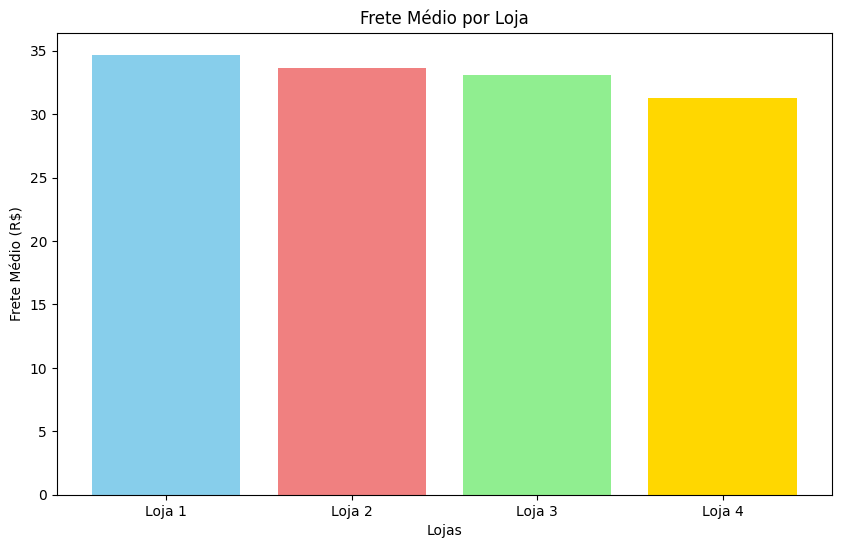

In [81]:
# Calculando o frete m√©dio de cada loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

# Criando um gr√°fico de barras para visualizar o frete m√©dio de cada loja
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes_medios = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]

plt.figure(figsize=(10, 6))
plt.bar(lojas, fretes_medios, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Frete M√©dio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Frete M√©dio (R$)')
plt.show()


**üìä Relat√≥rio de An√°lise para Decis√£o de Venda ‚Äì Senhor Jo√£o**

Este relat√≥rio tem como finalidade orientar o Senhor Jo√£o na escolha da loja que dever√° ser vendida entre suas quatro unidades. A decis√£o foi baseada em uma an√°lise criteriosa de indicadores-chave de desempenho, como faturamento total, categorias de produtos mais e menos vendidos, avalia√ß√µes m√©dias dos clientes, produtos com maior e menor giro, e o custo m√©dio de frete por loja.

Esses dados permitem identificar qual loja apresenta menor desempenho geral e oferece menor potencial de crescimento e lucratividade, sendo, portanto, a mais adequada para ser descontinuada.



1. **Faturamento Total**
A Loja 1 lidera em faturamento, indicando alto volume de vendas e produtos de maior valor agregado. Este √© um sinal claro de for√ßa no mercado e de boa performance financeira.

üèÜ **Loja com melhor faturamento: Loja 1**


2. **Categorias de Produtos Mais Vendidas**
As categorias de maior sa√≠da em todas as lojas s√£o **M√≥veis** e **Eletr√¥nicos**. Essas categorias t√™m alto ticket m√©dio e boa rotatividade, sendo fundamentais para manter margens saud√°veis.

üìå **Loja 1**, com a venda da TV Led UHD 4K, e **Loja 3**, com o Kit de Banquetas, est√£o fortemente alinhadas com essas categorias de destaque.


3. **Avalia√ß√£o M√©dia dos Clientes**
A **Loja 3** apresenta a melhor m√©dia de avalia√ß√µes, indicando alta satisfa√ß√£o dos clientes em rela√ß√£o ao atendimento, entrega e qualidade dos produtos.

‚≠ê **Loja mais bem avaliada pelos clientes: Loja 3**


4. **Produtos Mais e Menos Vendidos**

**Produtos mais vendidos:**
Loja 1: TV Led UHD 4K
Loja 2: Iniciando em Programa√ß√£o
Loja 3: Kit Banquetas
Loja 4: Cama Box


**Produtos menos vendidos:**
Loja 1: Headset
Loja 2: Jogo de Tabuleiro
Loja 3: Blocos de Montar
Loja 4: Guitarra

O produto mais vendido da Loja 2 √© um livro ("Iniciando em Programa√ß√£o"), que possui baixo valor agregado, o que limita o faturamento. Al√©m disso, o produto menos vendido (jogo de tabuleiro) refor√ßa uma oferta de produtos com pouca atratividade.

5. **Frete M√©dio por Loja**

Loja	Frete M√©dio (R$)
Loja 1	34,69
Loja 2	33,62
Loja 3	33,07
Loja 4	31,28
A **Loja 4** possui o menor custo de frete, sendo mais competitiva logisticamente. Por outro lado, a **Loja 1**, embora com o maior custo de frete, compensa isso com o maior faturamento.

**Conclus√£o e Recomenda√ß√£o**
Ap√≥s a an√°lise de todos os crit√©rios, recomenda-se a venda da **Loja 2**.

‚úÖ **Justificativa:**
Possui produto mais vendido de baixo valor agregado, o que impacta negativamente o faturamento.
Produto menos vendido indica fraca demanda e falta de sinergia com as categorias principais.
N√£o apresenta destaque em nenhum indicador relevante (n√£o lidera em faturamento, nem avalia√ß√£o, nem custo log√≠stico).
Frete m√©dio razo√°vel, mas sem diferencial competitivo claro.

üõë **Lojas que devem ser mantidas:**

Loja 1: Maior faturamento e presen√ßa forte em eletr√¥nicos.
Loja 3: Melhor avalia√ß√£o dos clientes, produto mais vendido dentro de categoria de destaque (m√≥veis).
Loja 4: Menor custo de frete e produto mais vendido com bom giro (cama box).


üèÅ **Decis√£o Final: Vender a Loja 2**